In [47]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

# Generate data

In [4]:
dims = [i*1000 for i in range(1, 11)] + [20000]
iter = np.ceil([10**(2-i) for i in range(len(dims))])
odir = "./spacings/"
ofname = "eigen_space"

for i, dim in enumerate(dims):
    os.system("./exercise03b -m " + str(dim) + " -i " + str(int(iter[i])) + " -o " + odir + ofname)
    os.system("./exercise03b -m " + str(dim) + " -i " + str(int(iter[i])) + " -r" + " -o " + odir + ofname)

Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.
Spacings calculations, 100.00% done.


# Read and plot data
## Read

In [109]:
min, rmin  = 2**30, 0
max, rmax  = 0, 0
data_list  = []
datar_list = []
for dim in dims:
    data  = np.loadtxt(f'spacings/eigen_space{dim}.txt')
    datar = np.loadtxt(f'spacings/eigen_space{dim}r.txt')
    data_list.append(data.flatten())
    datar_list.append(datar.flatten())
    if(data.min() < min): min = data.min()
    if(data.max() > max): max = data.max()
    if(datar.min() < rmin): rmin = datar.min()
    if(datar.max() > rmax): rmax = datar.max()

bins = np.linspace(min, max, 250) 
binsr = np.linspace(rmin, rmax, 250) 

## w/ vs w/out first eigenvalue distribution of normalized spacings

/tmp/ipykernel_2613/2913963103.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


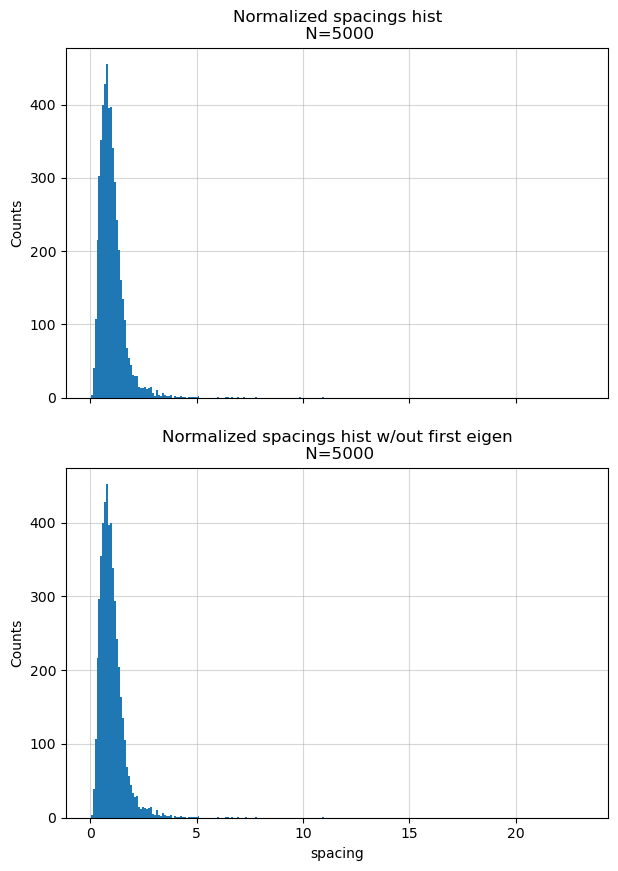

In [110]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)
ax1.hist(x=np.loadtxt('spacings/eigen_space5000.txt').flatten(), bins=bins, zorder=2)
ax2.hist(x=np.loadtxt('spacings/eigen-1_space5000.txt').flatten(), bins=bins, zorder=2)

ax1.grid(alpha=0.5, zorder=1)
ax1.set_title("Normalized spacings hist\n N=5000")
ax1.set_ylabel("Counts")
ax2.set_title("Normalized spacings hist w/out first eigen\n N=5000")
ax2.set_xlabel("spacing")
ax2.set_ylabel("Counts")
ax2.grid(alpha=0.5, zorder=1)
fig.show()
fig.savefig("wvswout.svg")

## Complex vs Real distribution of normalized spacings

In [111]:
#define fit function
def f(s, a, alpha, b, beta):
    return (a*s**alpha)*np.exp(b*s**beta)

/tmp/ipykernel_2613/971010281.py:3: RuntimeWarning: overflow encountered in exp
  return (a*s**alpha)*np.exp(b*s**beta)
/tmp/ipykernel_2613/205234203.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


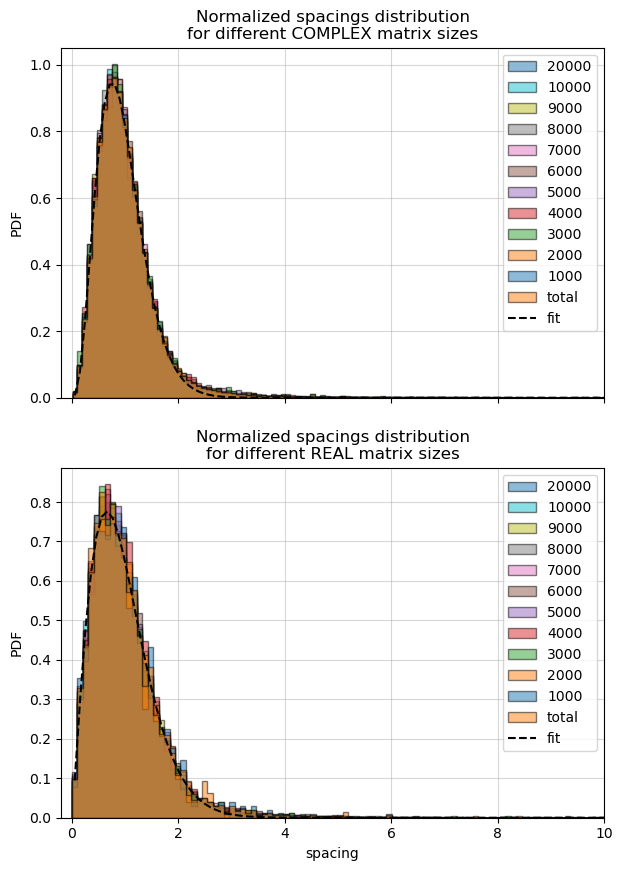

In [123]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)
ax1.hist(x=data_list, bins=bins, density=True, alpha=0.5, histtype='stepfilled', edgecolor='black', label=dims, zorder=2)
ax2.hist(x=datar_list, bins=binsr, density=True, alpha=0.5, histtype='stepfilled', edgecolor='black', label=dims, zorder=2)
y, bins, _ = ax1.hist(x=np.concatenate(data_list), bins=bins, density=True, alpha=0.5, histtype='stepfilled', edgecolor='black', label='total', zorder=2)
yr, binsr, _ = ax2.hist(x=np.concatenate(datar_list), bins=binsr, density=True, alpha=0.5, histtype='stepfilled', edgecolor='black', label='total', zorder=2)

popt, pcov = scipy.optimize.curve_fit(f, (bins[:-1] + bins[1:])/2, y, [1.31, 0, -0.5, 2.5], maxfev=10000)
ax1.plot((bins[:-1] + bins[1:])/2, f((bins[:-1] + bins[1:])/2, *popt), c='black', ls='--', label='fit')
poptr, pcovr = scipy.optimize.curve_fit(f, (binsr[:-1] + binsr[1:])/2, yr, [1.31, 0, -0.5, 2.5], maxfev=10000)
ax2.plot((binsr[:-1] + binsr[1:])/2, f((binsr[:-1] + binsr[1:])/2, *poptr), c='black', ls='--', label='fit')

ax1.legend()
ax1.grid(alpha=0.5, zorder=1)
ax1.set_xlim(-0.2, 10)
ax1.set_title("Normalized spacings distribution\nfor different COMPLEX matrix sizes")
ax1.set_ylabel("PDF")
ax2.grid(alpha=0.5, zorder=1)
ax2.set_title("Normalized spacings distribution\nfor different REAL matrix sizes")
ax2.set_xlabel("spacing")
ax2.set_ylabel("PDF")
ax2.legend()
fig.show()
fig.savefig('./realvscomlex.svg')

## Fit results

In [129]:
delta = (bins[1] + bins[2])/2
deltar = (binsr[1] + binsr[2])/2
print('hermitian matrix fit:', popt, f'most probable spacing: {bins[np.argmax(y)]+delta}',sep='\n')
print('\nreal sym matrix fit:', poptr, f'most probable spacing: {binsr[np.argmax(yr)]+deltar}', sep='\n')

hermitian matrix fit:
[14.94192674  2.62232994 -2.90998081  1.29710858]
most probable spacing: 0.9026781365892511

real sym matrix fit:
[ 2.73381457  1.12227797 -1.44193389  1.43954321]
most probable spacing: 0.8656479200599458
